#### Instruction (Read this)
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- But remove <b>unnecessary</b> cells to ensure the notebook is readable.
- Marks will be <b>deducted</b> if the notebook is cluttered or difficult to follow due to excess or irrelevant content.
- <b>Briefly</b> describe the steps in the "Description:" field.
- <b>Do not</b> submit the dataset. 
- The submitted jupyter notebook will be executed using the uploaded dataset in eLearn.

#### Group Information

Group No: Climate2

- Member 1: Ng Xuan Hern 22304061
- Member 2: Lim Wei Ling 22306277
- Member 3: Lim Yi Jie 22304136
- Member 4: Joanne Loi Jin Xu 22303573


#### Import libraries

In [1]:
%config Completer.use_jedi=False 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

#### Load the dataset

In [2]:
df=pd.read_csv("climate.csv")

In [3]:
df

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,...,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,...,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,...,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,...,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


In [4]:
#EDA to understand the dataset

df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study                 540 non-null    int64  
 1   Run                   540 non-null    int64  
 2   vconst_corr           540 non-null    float64
 3   vconst_2              540 non-null    float64
 4   vconst_3              540 non-null    float64
 5   vconst_4              540 non-null    float64
 6   vconst_5              540 non-null    float64
 7   vconst_7              540 non-null    float64
 8   ah_corr               540 non-null    float64
 9   ah_bolus              540 non-null    float64
 10  slm_corr              540 non-null    float64
 11  efficiency_factor     540 non-null    float64
 12  tidal_mix_max         540 non-null    float64
 13  vertical_decay_scale  540 non-null    float64
 14  convect_corr          540 non-null    float64
 15  bckgrnd_vdc1          5

Study                     3
Run                     180
vconst_corr             540
vconst_2                540
vconst_3                540
vconst_4                540
vconst_5                540
vconst_7                540
ah_corr                 540
ah_bolus                540
slm_corr                540
efficiency_factor       540
tidal_mix_max           540
vertical_decay_scale    540
convect_corr            540
bckgrnd_vdc1            540
bckgrnd_vdc_ban         540
bckgrnd_vdc_eq          540
bckgrnd_vdc_psim        540
Prandtl                 540
outcome                   2
dtype: int64

In [5]:
# Drop 'Run' because it is a sequential identifier (1-180) of each study which has no predictive meaning
# Keeping 'Study' because it represents three separate latin hypercube ensembles (might be different sampling strategies)
df = df.drop(columns=['Run'])

# Check the shape of the dataset
print(df.shape)

(540, 20)


#### Split the dataset
Split the dataset into training, validation and test sets.
The ratio is 7:1:2.

In [6]:
#separate features and target
X = df.drop(columns=['outcome'])
y = df['outcome']

seed_num = 10

# Split the dataset into 70% training and 30% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=seed_num)

# Second split into 10% validation and 20% test data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=seed_num)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (378, 19)
Validation set: (54, 19)
Test set: (108, 19)


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description: <br>
Firstly, we saved feature names before the standardization to preserve the columns names for later feature selection purpose. Next, we initialise a StandardScaler to carry out standardization. The StandardScaler was only fitted on the training data to compute its mean and standard deviation. This is crucial to prevent data leakage. The learned mean and standard deviation were then used to transform the validation and test data to ensure all datasets are standardized in the same way. No label encoding was carried out because all features are already numerical.


In [7]:
# Store feature names before converting to NumPy arrays (for interpretability)
feature_names = X.columns.tolist()

# Create an instance of the StandardScaler
scaler = StandardScaler()

# fit standard scaler on training data only to learn from it
X_train = scaler.fit_transform(X_train) 

# apply same transformation to validation and test data using training scaler 
X_val = scaler.transform(X_val)   
X_test = scaler.transform(X_test)

#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:
<br> 
Decision Tree selects the best feature at each node based on how well it reduces impurity. Firstly, a temporary decison tree was trained on the standardized training data. Next, we used the built-in feature importances function to compute the importance score of each feature. Then, we used another built-in function to automatically select features whose importance scores exceeded the mean importance threshold. Using the median as the threshold selects features with above-average importance while avoiding distortion from extreme values, maintaining a simpler model and lowering overfitting risks. Lastly, we transformed all datasets to include only the selected features

<br>
Meanwhile, SVM does not have built-in feature importances scores like decision tree. Instead, SVM has many popular feature selection methods such as forward feature selection, backward feature selection and recursive feature selection. In our project, a temporary SVM model was initialised and Sequential Feature Selection (SFS) is used to train on the standardized training data. Unlike decision trees, which allow thresholding based on numeric importance scores, SFS requires specifying the number of features to select in advance.Then similarly we transformed all datasets to include only the selected features.

In [8]:
# DECISION TREE'S FEATURE SELECTION

# train temporary tree to get feature importance
selector_tree = DecisionTreeClassifier(criterion='gini', random_state=seed_num)
selector_tree.fit(X_train, y_train)

# Use built-in function to calculate the importance of each feature
# The higher the value, the higher the influence of the feature in splitting
importances = selector_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nFeature Importances (sorted):")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Automatically select features using median importance threshold
selector_dt = SelectFromModel(selector_tree, prefit=True, threshold='median')

# Keep the selected feature in all splits 
X_train_selected_dt = selector_dt.transform(X_train)
X_val_selected_dt = selector_dt.transform(X_val)
X_test_selected_dt = selector_dt.transform(X_test)

# Get the feature names that are selected 
selected_mask_dt = selector_dt.get_support()
selected_feature_names_dt = [feature_names[i] for i in np.where(selected_mask_dt)[0]]
print("\nSelected Features:", selected_feature_names_dt)
print("Number of selected features:", X_train_selected_dt.shape[1])


Feature Importances (sorted):
                 Feature  Importance
2               vconst_2    0.348280
1            vconst_corr    0.115157
14          bckgrnd_vdc1    0.098152
13          convect_corr    0.083642
6               vconst_7    0.072907
7                ah_corr    0.063795
11         tidal_mix_max    0.050510
4               vconst_4    0.046637
3               vconst_3    0.044269
15       bckgrnd_vdc_ban    0.031126
12  vertical_decay_scale    0.026561
17      bckgrnd_vdc_psim    0.018962
0                  Study    0.000000
8               ah_bolus    0.000000
5               vconst_5    0.000000
10     efficiency_factor    0.000000
9               slm_corr    0.000000
16        bckgrnd_vdc_eq    0.000000
18               Prandtl    0.000000

Selected Features: ['vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4', 'vconst_7', 'ah_corr', 'tidal_mix_max', 'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban']
Number of selected features: 10


In [9]:
# SVM'S FEATURE SELECTION

# Initialise the SVM model
model_svm = SVC(kernel='poly', degree=2, gamma='scale', coef0=1, C=5, random_state=seed_num)

# Initialize SFS
selector_svm = SFS(
    estimator=model_svm,
    n_features_to_select=10, 
    direction='forward',
    scoring='f1_weighted',
    cv=5
)

# Fit the feature selector on the scaled training data
selector_svm.fit(X_train, y_train)
    
# Transform the datasets to include only the selected features
X_train_selected_svm = selector_svm.transform(X_train)
X_val_selected_svm = selector_svm.transform(X_val)
X_test_selected_svm = selector_svm.transform(X_test)

# Get the names of selected features
selected_mask_svm = selector_svm.get_support()
selected_feature_names_svm = [feature_names[i] for i in np.where(selected_mask_svm)[0]]
print("\nSelected Features:", selected_feature_names_svm)
print("Number of selected features:", X_train_selected_svm.shape[1])


Selected Features: ['Study', 'vconst_corr', 'vconst_2', 'vconst_4', 'slm_corr', 'tidal_mix_max', 'vertical_decay_scale', 'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_eq']
Number of selected features: 10


#### Hyperparameter tuning
After feature selection which reduces noise and selects relevant features, hyperparameter tuning is carried out to optimise the model's behaviour for those selected features.
______________________________________________________________________________________
Description:
<br>
GridSearchCV is used to automate the hyperparameter tuning for both Decision Tree (DT) and Support Vector Machine (SVM) models. Since the dataset is quite imbalanced, weighted F1 score is used as the evaluation metric to better reflect the model’s performance across all classes. K fold cross validation is also used to reduce overfitting. 
<br><br>
The hyperparameter tuning steps in both DT and SVM are quite similar. Firstly, we define the parameters, for example in DT, it will be maximum depth, minimum samples to split, etc... while in SVM it will be kernel types, c values, etc... Next, we set the scoring metric and cross validation stratergy then initialise the corresponding model. Grid search is then applied. GridSearchCV identifies the hyperparameter combination yielding the highest average weighted F1 score across folds and refits the best model on the full training data. Lastly, we evaluated the best model on the validation set.


In [10]:
# DECISION TREE'S HYPERPARAMETER TUNING

# Define maximum depth, minimum samples to split, criterion for split quality
param_grid_dt = {
    'max_depth': list(range(3, 8)),
    'min_samples_split': list(range(2, 8)),
}

# Weighted F1 scorer
scorer = make_scorer(f1_score, average='weighted')

# Define KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=seed_num)

# Initialise decision tree
dt = DecisionTreeClassifier(random_state=seed_num)

# Grid search 
grid_search_dt = GridSearchCV(dt, param_grid=param_grid_dt, scoring=scorer, cv=kf, refit=True)

# Fit on selected features
grid_search_dt.fit(X_train_selected_dt, y_train)

# Best model
best_dt_model = grid_search_dt.best_estimator_

# Validation performance using weighted F1
val_f1 = f1_score(y_val, best_dt_model.predict(X_val_selected_dt), average='weighted')

# Print summary
print("\n=== Best DT Model Summary ===")
print(f"Best Decision Tree Parameters → {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Weighted F1 Score: {grid_search_dt.best_score_:.4f}")
print(f"Validation Weighted F1 Score: {val_f1:.4f}")


=== Best DT Model Summary ===
Best Decision Tree Parameters → {'max_depth': 4, 'min_samples_split': 2}
Best Cross-Validation Weighted F1 Score: 0.8966
Validation Weighted F1 Score: 0.8499


In [11]:
# SVM'S HYPERPARAMETER TUNING

# Define kernels, the range for C values and degree for poly kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c_values = range(1, 11)
degree_values = [2, 3, 4] 

# Initialize the GridSearchCV object with a custom scorer for F1 Score
scorer = make_scorer(f1_score, average='weighted')

# Define KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=seed_num)

# Track best overall model
best_svm_model = None
best_svm_score = 0
best_svm_params = None

for kernel in kernels:
    if kernel == 'poly':
        param_grid = {
            'C': c_values,
            'kernel': [kernel],
            'degree': degree_values
        }
    else:
        param_grid = {
            'C': c_values,
            'kernel': [kernel]
        }

    # Grid search
    svc = SVC(random_state=seed_num)
    grid_search = GridSearchCV(svc, param_grid, scoring=scorer, cv=kf, refit=True)
    grid_search.fit(X_train_selected_svm, y_train)

     # Update the overall best model if the current one is better
    if grid_search.best_score_ > best_svm_score:
        best_svm_score = grid_search.best_score_
        best_svm_params = grid_search.best_params_
        best_svm_model = grid_search.best_estimator_
        
# Validation score
svm_val_f1 = f1_score(y_val, best_svm_model.predict(X_val_selected_svm), average='weighted')

# Print the overall best model results
print("=== Best SVM Model Summary ===")
print(f"Best SVM Parameters → {best_svm_params}")
print(f"Best Cross-Validation Weighted F1 Score: {best_svm_score:.4f}")
print(f"Validation Weighted F1 Score: {svm_val_f1:.4f}")

=== Best SVM Model Summary ===
Best SVM Parameters → {'C': 10, 'kernel': 'linear'}
Best Cross-Validation Weighted F1 Score: 0.9530
Validation Weighted F1 Score: 0.9204


#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:
<br>
After finding the best models for both DT and SVM, we use them to predict on the test set respectively. For DT, we also visualize the best tree structure meanwhile for SVM, there is no visualisation since it is hard to plot the decison boundary of high dimensional data.


Tree structure (text form):
|--- vconst_corr <= 0.82
|   |--- vconst_4 <= -1.56
|   |   |--- vconst_2 <= 0.43
|   |   |   |--- class: 1
|   |   |--- vconst_2 >  0.43
|   |   |   |--- ah_corr <= 0.55
|   |   |   |   |--- class: 0
|   |   |   |--- ah_corr >  0.55
|   |   |   |   |--- class: 1
|   |--- vconst_4 >  -1.56
|   |   |--- bckgrnd_vdc_ban <= -1.66
|   |   |   |--- vconst_3 <= 0.69
|   |   |   |   |--- class: 1
|   |   |   |--- vconst_3 >  0.69
|   |   |   |   |--- class: 0
|   |   |--- bckgrnd_vdc_ban >  -1.66
|   |   |   |--- ah_corr <= 1.66
|   |   |   |   |--- class: 1
|   |   |   |--- ah_corr >  1.66
|   |   |   |   |--- class: 0
|--- vconst_corr >  0.82
|   |--- vconst_2 <= 1.19
|   |   |--- vconst_2 <= 0.18
|   |   |   |--- class: 1
|   |   |--- vconst_2 >  0.18
|   |   |   |--- bckgrnd_vdc1 <= -0.14
|   |   |   |   |--- class: 0
|   |   |   |--- bckgrnd_vdc1 >  -0.14
|   |   |   |   |--- class: 1
|   |--- vconst_2 >  1.19
|   |   |--- convect_corr <= -1.18
|   |   |   |-

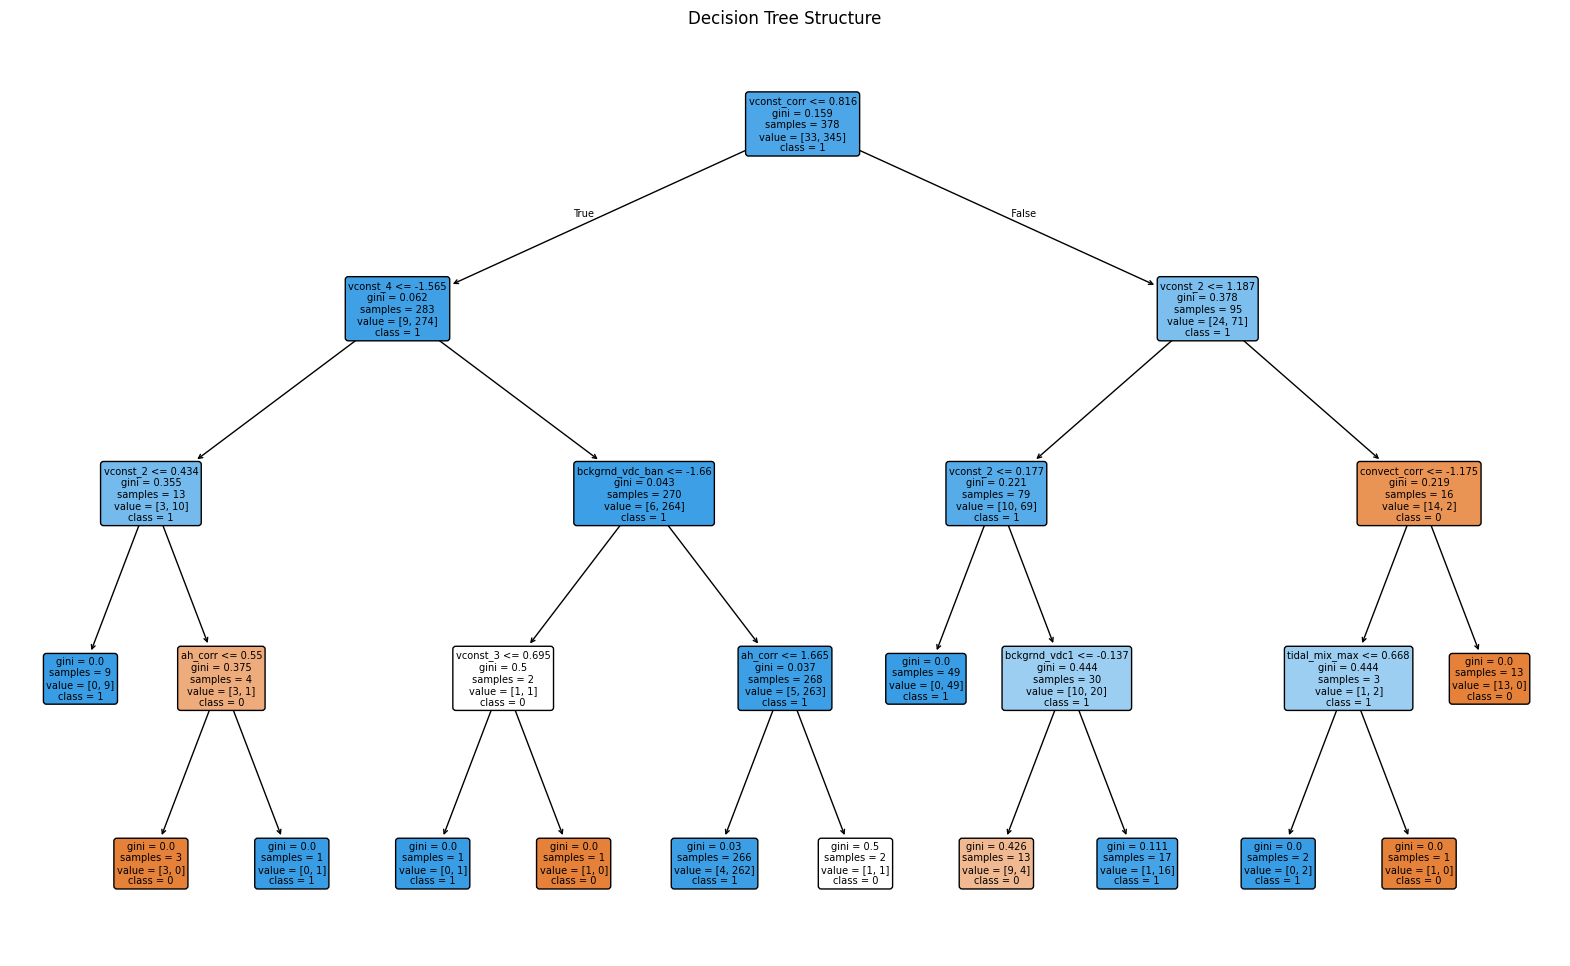

In [12]:
# DECISION TREE'S DATA MODELING

# Visualising best tree in text form
print("\nTree structure (text form):")
print(export_text(best_dt_model, feature_names=selected_feature_names_dt))

# Tree form
plt.figure(figsize=(20, 12))
plot_tree(best_dt_model, 
          feature_names=selected_feature_names_dt, 
          class_names=[str(cls) for cls in best_dt_model.classes_],
          filled=True, 
          rounded=True)
plt.title("Decision Tree Structure")
plt.show()

# Use best decision tree model to predict on the test set
y_pred_dt = best_dt_model.predict(X_test_selected_dt)

In [13]:
# SVM DATA MODELING

# Predict on test set using the best SVM model
y_pred_svm = best_svm_model.predict(X_test_selected_svm)

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description:
<br>
Both models perform well in predicting class 1, with SVM slightly better in accuracy and F1 score. However, SVM outperforms DT significatnly in predicting class 0. This is because SVM's design like  kernel trick and margin optimization excels in handling class imbalance and high-dimensional data. SVM is also less prone to overfitting compared to DT, especially when using a soft margin. Additionally, decision tree tends to priortise majority class during training which causes them to struggle when dealing with imbalanced dataset.

=== Decision Tree Model Performance ===

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.98      0.94      0.96       100

    accuracy                           0.93       108
   macro avg       0.74      0.84      0.78       108
weighted avg       0.94      0.93      0.93       108

Accuracy: 0.9259259259259259

Confusion Matrix:
 [[ 6  2]
 [ 6 94]]


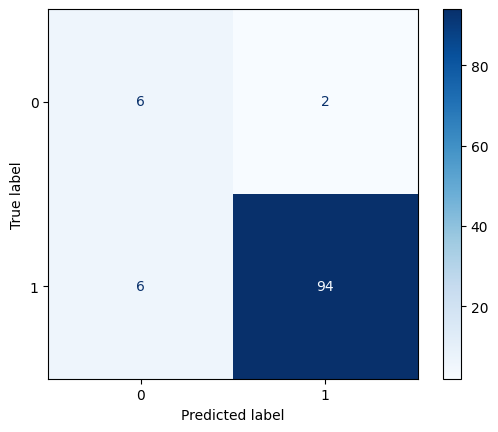

In [14]:
# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_class_report = classification_report(y_test, y_pred_dt)

# Display results
print("=== Decision Tree Model Performance ===")
print("\nClassification Report:\n", dt_class_report)
print("Accuracy:", dt_accuracy)
print("\nConfusion Matrix:\n", dt_conf_matrix)

# Display confusion matrix using a heatmap
disp_dt = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix)
disp_dt.plot(cmap='Blues') 
plt.show()

=== Support Vector Machine Model Performance ===

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.99      1.00      1.00       100

    accuracy                           0.99       108
   macro avg       1.00      0.94      0.96       108
weighted avg       0.99      0.99      0.99       108

Accuracy: 0.9907407407407407

Confusion Matrix:
 [[  7   1]
 [  0 100]]


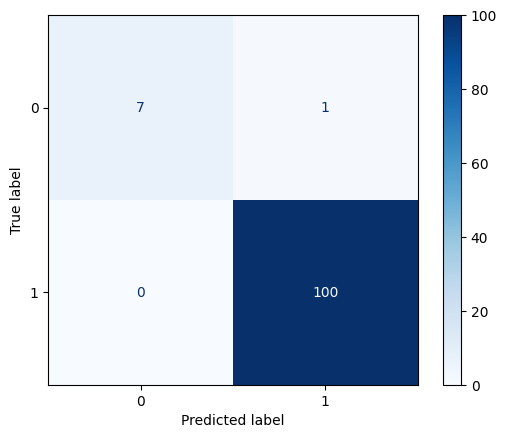

In [15]:
# Calculate metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_class_report = classification_report(y_test, y_pred_svm)

# Display results
print("=== Support Vector Machine Model Performance ===")
print("\nClassification Report:\n", svm_class_report)
print("Accuracy:", svm_accuracy)
print("\nConfusion Matrix:\n", svm_conf_matrix)

# Display confusion matrix using a heatmap
disp_svm = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix)
disp_svm.plot(cmap='Blues') 
plt.show()
